In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**The goal of the notebook is to understand and find insights from the data.**

In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [5]:
df.groupby(['income'])["age"].agg({'mean','min','max'})

,max,min,mean
income,,,
<=50K,90,17,36.872184
>50K,90,19,44.275178


(array([8339., 7511., 6604., 5823., 3602., 2521., 1812.,  629.,  236.,
          78.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

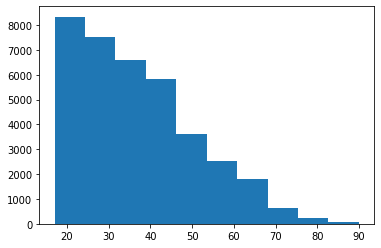

In [6]:
l = df.groupby('income')
lt50 = l.get_group('<=50K')
gt50 = l.get_group('>50K')
import matplotlib.pyplot as plt
plt.hist(lt50['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


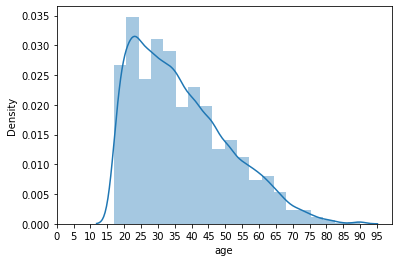

In [7]:
import seaborn as sns
p = sns.distplot(lt50['age'],bins=20)
p.set_xticks(list(range(0,100,5)))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


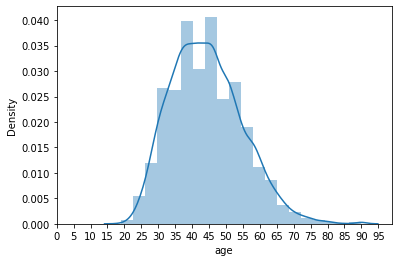

In [8]:
q = sns.distplot(gt50['age'],bins=20)
q.set_xticks(list(range(0,100,5)))
plt.show()

In [9]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [10]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df.groupby(['workclass','income'])['age'].describe()

count       mean        std   min   25%   50%  \
workclass        income                                                    
?                <=50K    2534.0  38.521705  20.128253  17.0  21.0  30.0   
                 >50K      265.0  55.626415  13.557679  19.0  48.0  60.0   
Federal-gov      <=50K     871.0  40.556831  12.330084  17.0  31.0  40.0   
                 >50K      561.0  45.714795   9.049306  25.0  39.0  45.0   
Local-gov        <=50K    2209.0  40.576279  13.417107  17.0  30.0  39.0   
                 >50K      927.0  44.296656   9.297543  22.0  38.0  45.0   
Never-worked     <=50K      10.0  19.900000   3.984693  17.0  18.0  18.0   
Private          <=50K   26519.0  35.241487  13.116728  17.0  25.0  33.0   
                 >50K     7387.0  42.868417  10.079189  19.0  35.0  42.0   
Self-emp-inc     <=50K     757.0  43.273448  14.048404  17.0  33.0  42.0   
                 >50K      938.0  47.837953  11.004383  23.0  40.0  47.0   
Self-emp-not-inc <=50K    2785.0  44.804309  14.177933  17.0  34.0  43.0   
                 >50K     1077.0  46.698236  11.487868  22.0  38.0  46.0   
State-gov        <=50K    1451.0  37.373535  12.459190  17.0  27.0  36.0   
                 >50K      530.0  45.367925  10.051028  22.0  38.0  45.0   
Without-pay      <=50K      19.0  46.263158  20.770818  19.0  24.5  51.0   
                 >50K        2.0  57.000000   9.899495  50.0  53.5  57.0   

                          75%   max  
workclass        income              
?                <=50K   59.0  90.0  
                 >50K    65.0  90.0  
Federal-gov      <=50K   49.0  90.0  
                 >50K    52.0  79.0  
Local-gov        <=50K   50.0  90.0  
                 >50K    50.0  90.0  
Never-worked     <=50K   20.0  30.0  
Private          <=50K   43.0  90.0  
                 >50K    50.0  90.0  
Self-emp-inc     <=50K   52.0  83.0  
                 >50K    54.0  85.0  
Self-emp-not-inc <=50K   55.0  90.0  
                 >50K    55.0  90.0  
State-gov        <=50K   45.0  81.0  
                 >50K    52.0  77.0  
Without-pay      <=50K   65.0  74.0  
                 >50K    60.5  64.0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


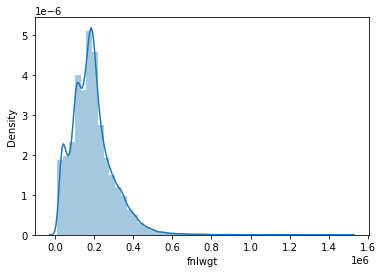

In [12]:
import seaborn as sns
p = sns.distplot(lt50['fnlwgt'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


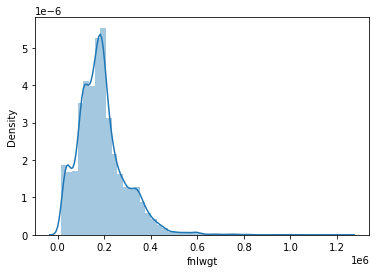

In [13]:
p = sns.distplot(gt50['fnlwgt'])
plt.show()

In [14]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [15]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [16]:
df.groupby(['education','income'])['age'].describe()

count       mean        std   min    25%   50%    75%  \
education    income                                                            
10th         <=50K    1302.0  37.102919  16.938243  17.0  22.00  34.0  51.00   
             >50K       87.0  49.873563  10.842214  26.0  40.50  51.0  58.00   
11th         <=50K    1720.0  31.383721  14.927101  17.0  18.00  27.0  40.00   
             >50K       92.0  46.315217  14.237336  22.0  35.25  46.0  57.25   
12th         <=50K     609.0  31.305419  14.444152  17.0  18.00  27.0  40.00   
             >50K       48.0  44.041667  12.665850  19.0  37.25  44.0  52.00   
1st-4th      <=50K     239.0  46.464435  15.343880  19.0  34.00  46.0  57.50   
             >50K        8.0  51.875000   7.278883  41.0  49.50  52.5  55.50   
5th-6th      <=50K     482.0  43.329876  15.708927  17.0  29.00  43.0  55.00   
             >50K       27.0  48.148148  11.309301  22.0  42.50  49.0  56.00   
7th-8th      <=50K     893.0  49.244121  16.449160  17.0  36.00  50.0  61.00   
             >50K       62.0  53.580645  13.253578  19.0  45.50  57.0  62.75   
9th          <=50K     715.0  40.415385  15.925141  17.0  27.00  38.0  53.00   
             >50K       41.0  49.390244  11.189008  28.0  40.00  52.0  58.00   
Assoc-acdm   <=50K    1188.0  36.143098  11.266014  19.0  27.00  34.0  43.00   
             >50K      413.0  42.476998  10.288205  21.0  36.00  41.0  48.00   
Assoc-voc    <=50K    1539.0  37.506823  11.998284  19.0  29.00  35.0  44.00   
             >50K      522.0  42.024904   9.824826  23.0  35.00  41.0  48.00   
Bachelors    <=50K    4712.0  36.207131  12.144393  19.0  26.00  33.0  43.00   
             >50K     3313.0  42.721099  10.395679  21.0  35.00  42.0  49.00   
Doctorate    <=50K     163.0  45.006135  13.072682  24.0  34.00  43.0  55.00   
             >50K      431.0  48.484919  10.663309  27.0  41.00  48.0  55.00   
HS-grad      <=50K   13281.0  37.978691  13.878396  17.0  27.00  35.0  47.00   
             >50K     2503.0  44.884539  10.666472  21.0  37.00  45.0  52.00   
Masters      <=50K    1198.0  42.297162  12.426096  18.0  32.00  41.0  50.00   
             >50K     1459.0  45.410555   9.526480  23.0  39.00  45.0  51.00   
Preschool    <=50K      82.0  41.975610  15.340558  19.0  30.00  40.5  53.00   
             >50K        1.0  61.000000        NaN  61.0  61.00  61.0  61.00   
Prof-school  <=50K     217.0  43.847926  15.629978  25.0  30.00  40.0  55.00   
             >50K      617.0  45.611021  10.693080  26.0  38.00  44.0  52.00   
Some-college <=50K    8815.0  33.708678  13.373854  17.0  22.00  30.0  42.00   
             >50K     2063.0  44.087736  10.444605  19.0  36.00  43.0  51.00   

                      max  
education    income        
10th         <=50K   90.0  
             >50K    83.0  
11th         <=50K   90.0  
             >50K    88.0  
12th         <=50K   81.0  
             >50K    79.0  
1st-4th      <=50K   90.0  
             >50K    61.0  
5th-6th      <=50K   84.0  
             >50K    73.0  
7th-8th      <=50K   90.0  
             >50K    77.0  
9th          <=50K   90.0  
             >50K    72.0  
Assoc-acdm   <=50K   90.0  
             >50K    90.0  
Assoc-voc    <=50K   84.0  
             >50K    79.0  
Bachelors    <=50K   90.0  
             >50K    90.0  
Doctorate    <=50K   80.0  
             >50K    79.0  
HS-grad      <=50K   90.0  
             >50K    90.0  
Masters      <=50K   90.0  
             >50K    90.0  
Preschool    <=50K   77.0  
             >50K    61.0  
Prof-school  <=50K   90.0  
             >50K    90.0  
Some-college <=50K   90.0  
             >50K    84.0

In [17]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [18]:
df.groupby(['educational-num','income'])['age'].describe()

count       mean        std   min    25%   50%  \
educational-num income                                                     
1               <=50K      82.0  41.975610  15.340558  19.0  30.00  40.5   
                >50K        1.0  61.000000        NaN  61.0  61.00  61.0   
2               <=50K     239.0  46.464435  15.343880  19.0  34.00  46.0   
                >50K        8.0  51.875000   7.278883  41.0  49.50  52.5   
3               <=50K     482.0  43.329876  15.708927  17.0  29.00  43.0   
                >50K       27.0  48.148148  11.309301  22.0  42.50  49.0   
4               <=50K     893.0  49.244121  16.449160  17.0  36.00  50.0   
                >50K       62.0  53.580645  13.253578  19.0  45.50  57.0   
5               <=50K     715.0  40.415385  15.925141  17.0  27.00  38.0   
                >50K       41.0  49.390244  11.189008  28.0  40.00  52.0   
6               <=50K    1302.0  37.102919  16.938243  17.0  22.00  34.0   
                >50K       87.0  49.873563  10.842214  26.0  40.50  51.0   
7               <=50K    1720.0  31.383721  14.927101  17.0  18.00  27.0   
                >50K       92.0  46.315217  14.237336  22.0  35.25  46.0   
8               <=50K     609.0  31.305419  14.444152  17.0  18.00  27.0   
                >50K       48.0  44.041667  12.665850  19.0  37.25  44.0   
9               <=50K   13281.0  37.978691  13.878396  17.0  27.00  35.0   
                >50K     2503.0  44.884539  10.666472  21.0  37.00  45.0   
10              <=50K    8815.0  33.708678  13.373854  17.0  22.00  30.0   
                >50K     2063.0  44.087736  10.444605  19.0  36.00  43.0   
11              <=50K    1539.0  37.506823  11.998284  19.0  29.00  35.0   
                >50K      522.0  42.024904   9.824826  23.0  35.00  41.0   
12              <=50K    1188.0  36.143098  11.266014  19.0  27.00  34.0   
                >50K      413.0  42.476998  10.288205  21.0  36.00  41.0   
13              <=50K    4712.0  36.207131  12.144393  19.0  26.00  33.0   
                >50K     3313.0  42.721099  10.395679  21.0  35.00  42.0   
14              <=50K    1198.0  42.297162  12.426096  18.0  32.00  41.0   
                >50K     1459.0  45.410555   9.526480  23.0  39.00  45.0   
15              <=50K     217.0  43.847926  15.629978  25.0  30.00  40.0   
                >50K      617.0  45.611021  10.693080  26.0  38.00  44.0   
16              <=50K     163.0  45.006135  13.072682  24.0  34.00  43.0   
                >50K      431.0  48.484919  10.663309  27.0  41.00  48.0   

                          75%   max  
educational-num income               
1               <=50K   53.00  77.0  
                >50K    61.00  61.0  
2               <=50K   57.50  90.0  
                >50K    55.50  61.0  
3               <=50K   55.00  84.0  
                >50K    56.00  73.0  
4               <=50K   61.00  90.0  
                >50K    62.75  77.0  
5               <=50K   53.00  90.0  
                >50K    58.00  72.0  
6               <=50K   51.00  90.0  
                >50K    58.00  83.0  
7               <=50K   40.00  90.0  
                >50K    57.25  88.0  
8               <=50K   40.00  81.0  
                >50K    52.00  79.0  
9               <=50K   47.00  90.0  
                >50K    52.00  90.0  
10              <=50K   42.00  90.0  
                >50K    51.00  84.0  
11              <=50K   44.00  84.0  
                >50K    48.00  79.0  
12              <=50K   43.00  90.0  
                >50K    48.00  90.0  
13              <=50K   43.00  90.0  
                >50K    49.00  90.0  
14              <=50K   50.00  90.0  
                >50K    51.00  90.0  
15              <=50K   55.00  90.0  
                >50K    52.00  90.0  
16              <=50K   55.00  80.0  
                >50K    55.00  79.0

In [19]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [20]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [21]:
df.groupby(['marital-status','income'])['age'].describe()

count       mean        std   min   25%   50%  \
marital-status        income                                                    
Divorced              <=50K    5962.0  42.849715  10.680278  18.0  35.0  42.0   
                      >50K      671.0  45.909091   8.903752  23.0  40.0  46.0   
Married-AF-spouse     <=50K      23.0  31.173913  11.707232  19.0  26.0  29.0   
                      >50K       14.0  33.214286   9.065391  22.0  29.0  31.0   
Married-civ-spouse    <=50K   12395.0  42.482614  13.220609  17.0  32.0  40.0   
                      >50K     9984.0  44.435196  10.378725  19.0  37.0  44.0   
Married-spouse-absent <=50K     570.0  40.008772  12.910736  17.0  30.0  38.0   
                      >50K       58.0  46.551724  10.659272  28.0  40.0  45.5   
Never-married         <=50K   15384.0  27.640926   9.642031  17.0  21.0  25.0   
                      >50K      733.0  38.351978  10.800424  19.0  30.0  37.0   
Separated             <=50K    1431.0  39.518519  10.827486  18.0  31.0  38.0   
                      >50K       99.0  42.717172   9.614021  23.0  35.0  43.0   
Widowed               <=50K    1390.0  59.455396  12.283862  17.0  52.0  61.0   
                      >50K      128.0  58.531250  11.367821  29.0  51.0  58.0   

                                75%   max  
marital-status        income               
Divorced              <=50K   50.00  90.0  
                      >50K    51.00  75.0  
Married-AF-spouse     <=50K   31.50  75.0  
                      >50K    34.75  58.0  
Married-civ-spouse    <=50K   51.00  90.0  
                      >50K    51.00  90.0  
Married-spouse-absent <=50K   48.00  87.0  
                      >50K    51.00  77.0  
Never-married         <=50K   32.00  90.0  
                      >50K    44.00  90.0  
Separated             <=50K   46.50  90.0  
                      >50K    48.50  64.0  
Widowed               <=50K   68.00  90.0  
                      >50K    67.00  85.0

In [22]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [23]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [24]:
df.groupby(['occupation','income'])['age'].describe()

count       mean        std   min    25%   50%  \
occupation        income                                                    
?                 <=50K   2544.0  38.448506  20.123813  17.0  21.00  30.0   
                  >50K     265.0  55.626415  13.557679  19.0  48.00  60.0   
Adm-clerical      <=50K   4843.0  36.151972  13.625805  17.0  25.00  33.0   
                  >50K     768.0  43.757812  10.630266  21.0  36.00  43.0   
Armed-Forces      <=50K     10.0  27.300000   5.578729  23.0  23.25  24.0   
                  >50K       5.0  39.800000  10.779610  27.0  30.00  44.0   
Craft-repair      <=50K   4729.0  37.747727  11.800980  17.0  29.00  36.0   
                  >50K    1383.0  43.320318   9.576000  21.0  36.00  43.0   
Exec-managerial   <=50K   3178.0  39.739144  12.998302  17.0  29.00  38.0   
                  >50K    2908.0  44.886176  10.224910  22.0  37.00  44.0   
Farming-fishing   <=50K   1317.0  40.481397  15.690655  17.0  28.00  38.0   
                  >50K     173.0  47.364162  12.264066  24.0  39.00  46.0   
Handlers-cleaners <=50K   1934.0  31.892451  12.436525  17.0  22.00  28.0   
                  >50K     138.0  43.333333  10.939337  22.0  36.00  42.0   
Machine-op-inspct <=50K   2650.0  37.021132  12.335728  17.0  27.00  35.0   
                  >50K     372.0  42.830645   9.396095  22.0  36.00  42.0   
Other-service     <=50K   4719.0  34.781733  14.681840  17.0  22.00  32.0   
                  >50K     204.0  42.671569  11.283406  19.0  34.00  43.0   
Priv-house-serv   <=50K    239.0  43.410042  18.535886  17.0  25.50  43.0   
                  >50K       3.0  42.666667   7.505553  34.0  40.50  47.0   
Prof-specialty    <=50K   3388.0  37.887839  12.757896  17.0  28.00  36.0   
                  >50K    2784.0  43.811422  10.220002  19.0  36.00  43.0   
Protective-serv   <=50K    675.0  37.654815  14.020892  17.0  27.00  34.0   
                  >50K     308.0  41.626623   9.756992  21.0  34.00  42.0   
Sales             <=50K   4029.0  34.884835  14.466468  17.0  23.00  31.0   
                  >50K    1475.0  44.302373  11.042632  22.0  36.00  43.0   
Tech-support      <=50K   1026.0  34.941520  11.278838  17.0  26.00  32.0   
                  >50K     420.0  42.545238   9.492384  23.0  36.00  42.0   
Transport-moving  <=50K   1874.0  39.607257  12.895136  17.0  30.00  38.0   
                  >50K     481.0  44.719335  10.627511  22.0  37.00  45.0   

                            75%   max  
occupation        income               
?                 <=50K   58.25  90.0  
                  >50K    65.00  90.0  
Adm-clerical      <=50K   45.00  90.0  
                  >50K    50.00  90.0  
Armed-Forces      <=50K   29.75  39.0  
                  >50K    46.00  52.0  
Craft-repair      <=50K   45.00  90.0  
                  >50K    50.00  90.0  
Exec-managerial   <=50K   48.00  90.0  
                  >50K    51.00  90.0  
Farming-fishing   <=50K   51.00  90.0  
                  >50K    55.00  88.0  
Handlers-cleaners <=50K   39.00  90.0  
                  >50K    50.75  70.0  
Machine-op-inspct <=50K   45.00  90.0  
                  >50K    49.25  70.0  
Other-service     <=50K   45.00  90.0  
                  >50K    51.00  77.0  
Priv-house-serv   <=50K   59.50  84.0  
                  >50K    47.00  47.0  
Prof-specialty    <=50K   46.00  90.0  
                  >50K    50.00  90.0  
Protective-serv   <=50K   46.00  90.0  
                  >50K    49.00  75.0  
Sales             <=50K   45.00  90.0  
                  >50K    51.00  90.0  
Tech-support      <=50K   41.00  81.0  
                  >50K    50.00  67.0  
Transport-moving  <=50K   48.00  90.0  
                  >50K    53.00  71.0

In [25]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [26]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [27]:
df.groupby(['relationship','income'])['age'].describe()

count       mean        std   min   25%   50%    75%  \
relationship   income                                                           
Husband        <=50K   10870.0  43.100736  13.199241  17.0  33.0  41.0  52.00   
               >50K     8846.0  44.895659  10.371182  21.0  37.0  44.0  52.00   
Not-in-family  <=50K   11307.0  37.873707  14.123109  17.0  27.0  34.0  46.00   
               >50K     1276.0  43.276646  11.669882  19.0  35.0  42.0  51.00   
Other-relative <=50K    1454.0  33.133425  14.122172  17.0  22.0  28.0  41.75   
               >50K       52.0  41.461538  13.271614  19.0  31.5  39.0  50.00   
Own-child      <=50K    7470.0  24.636680   7.965668  17.0  19.0  22.0  27.00   
               >50K      111.0  35.387387  10.637132  19.0  28.0  34.0  41.50   
Unmarried      <=50K    4816.0  39.955772  11.726740  17.0  31.0  39.0  47.00   
               >50K      309.0  45.867314   9.386637  22.0  41.0  45.0  51.00   
Wife           <=50K    1238.0  39.260097  12.452277  18.0  29.0  37.0  47.00   
               >50K     1093.0  41.005489   9.711308  21.0  34.0  40.0  47.00   

                        max  
relationship   income        
Husband        <=50K   90.0  
               >50K    90.0  
Not-in-family  <=50K   90.0  
               >50K    90.0  
Other-relative <=50K   90.0  
               >50K    75.0  
Own-child      <=50K   90.0  
               >50K    90.0  
Unmarried      <=50K   90.0  
               >50K    75.0  
Wife           <=50K   81.0  
               >50K    90.0

In [28]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [30]:
df.groupby(['gender','income'])['age'].describe()

count       mean        std   min   25%   50%   75%   max
gender income                                                             
Female <=50K   14423.0  36.278999  14.387450  17.0  24.0  34.0  46.0  90.0
       >50K     1769.0  42.219333  10.504871  19.0  35.0  41.0  49.0  90.0
Male   <=50K   22732.0  37.248548  13.908567  17.0  26.0  35.0  46.0  90.0
       >50K     9918.0  44.641863  10.527021  19.0  37.0  44.0  51.0  90.0

In [31]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [32]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [33]:
df.groupby(['native-country','income'])['age'].describe()

count       mean        std   min   25%   50%   75%  \
native-country income                                                          
?              <=50K     637.0  36.919937  12.837330  17.0  27.0  34.0  44.0   
               >50K      220.0  44.136364  10.156742  22.0  37.0  43.0  51.0   
Cambodia       <=50K      19.0  35.894737  11.831665  18.0  28.0  34.0  38.5   
               >50K        9.0  39.000000   8.616844  26.0  35.0  40.0  46.0   
Canada         <=50K     119.0  42.873950  17.435379  17.0  28.0  40.0  57.5   
...                        ...        ...        ...   ...   ...   ...   ...   
United-States  >50K    10694.0  44.324855  10.552614  19.0  36.0  44.0  51.0   
Vietnam        <=50K      79.0  34.367089  13.283089  19.0  23.0  30.0  44.0   
               >50K        7.0  37.428571   9.880235  23.0  30.0  42.0  43.0   
Yugoslavia     <=50K      15.0  38.933333  13.440167  19.0  27.5  41.0  50.0   
               >50K        8.0  43.375000  12.591806  29.0  35.0  38.0  53.0   

                        max  
native-country income        
?              <=50K   90.0  
               >50K    76.0  
Cambodia       <=50K   65.0  
               >50K    50.0  
Canada         <=50K   80.0  
...                     ...  
United-States  >50K    90.0  
Vietnam        <=50K   73.0  
               >50K    51.0  
Yugoslavia     <=50K   56.0  
               >50K    66.0  

[83 rows x 8 columns]